In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from tqdm import tqdm 

In [2]:
J = -1
B = 2.

In [3]:
# Definiendo el array inicial

def random_spin_field(N,M):
    return np.random.choice([-1,1], size=(N,M))

In [4]:
N = 10
M = 10
sigma = random_spin_field(N,M)
print(sigma)

[[-1 -1 -1 -1  1 -1 -1  1 -1 -1]
 [ 1  1 -1 -1  1  1 -1 -1  1 -1]
 [ 1 -1 -1  1 -1 -1  1  1 -1  1]
 [ 1  1  1  1  1 -1 -1 -1 -1 -1]
 [ 1 -1  1  1  1  1 -1 -1  1  1]
 [-1 -1 -1  1  1 -1  1  1 -1  1]
 [-1  1 -1  1 -1 -1 -1  1 -1 -1]
 [ 1 -1  1 -1  1 -1  1 -1  1 -1]
 [-1  1 -1  1 -1 -1  1 -1 -1 -1]
 [ 1 -1 -1  1 -1 -1 -1  1  1  1]]


In [5]:
def GetEnergy(sigma):
    
    n = sigma.shape[0]
    m = sigma.shape[1]
    
    energy = 0.
     
    for i in range(n):
        for j in range(m):
            
            right = i+1
            if i == n-1:
                right = 0
                
            left = i-1
           
            up = j+1
            if j == m-1:
                up = 0
                
            down = j-1
            
            energy += 0.5*J*sigma[i,j]*\
            (sigma[right,j]+sigma[left,j]+sigma[i,up]+sigma[i,down])
    
    return energy

In [6]:
def GetMagnetization(sigma):
    return np.sum(sigma.ravel())/float(M*N)

In [7]:
print(GetEnergy(sigma), GetMagnetization(sigma))

(24.0, -0.1)


In [8]:
# Implementamos metropolis

def _ising_step(sigma, T):
    
    beta = 1./T
    
    current = sigma.copy()
    energy1 = GetEnergy(current)
    
    # Calcular una posición en el array
    x = randint(0,sigma.shape[0]-1)
    y = randint(0,sigma.shape[1]-1)
    
    future = current.copy()
    future[x,y] = current[x,y]*(-1)
    
    energy2 = GetEnergy(future)
    
    dE = energy2-energy1
    
    r =  np.random.rand()   
    
    if dE < 0.:
        return future
        
    elif r < np.exp(- dE * beta):
        return future
    
    else:
        return current

In [9]:
Energy = []
Energy2 = []
Magnetization = []

T = 3.0
Ntoys = 20000

sigma_ = sigma.copy()

for i in tqdm(range(Ntoys)):
    sigma_ = _ising_step(sigma_,T)
    
    if i > 10000:
        energy = GetEnergy(sigma_)
        magnetization = GetMagnetization(sigma_)
        Energy.append(energy)
        Energy2.append(energy**2)
        Magnetization.append(magnetization)

100%|██████████| 20000/20000 [00:08<00:00, 2438.46it/s]


In [10]:
e = np.average(Energy)
e2 = np.average(Energy2)
m = np.average(Magnetization)

cv = (e2 - e**2)/(float(M*N)*T**2)

print(e/float(M*N),m,cv)

(-0.7945034503450346, 0.276969696969697, 0.4462654150203485)


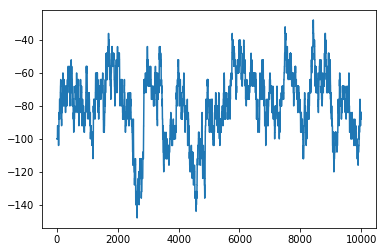

In [11]:
plt.figure()
plt.plot(Energy)

(array([  37.,  204.,  369.,  730., 1335., 2192., 2540., 1740.,  693.,
         159.]),
 array([-148., -136., -124., -112., -100.,  -88.,  -76.,  -64.,  -52.,
         -40.,  -28.]),
 <a list of 10 Patch objects>)

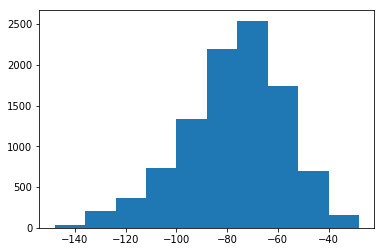

In [12]:
plt.figure()
plt.hist(Energy, bins=10)

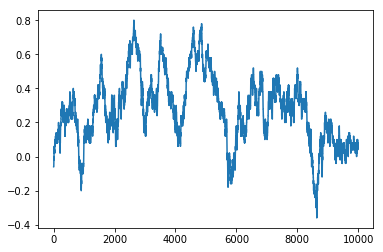

In [13]:
plt.figure()
plt.plot(Magnetization)

(array([  27.,  186.,  492., 1398., 1988., 2114., 1923.,  863.,  784.,
         224.]),
 array([-0.36 , -0.244, -0.128, -0.012,  0.104,  0.22 ,  0.336,  0.452,
         0.568,  0.684,  0.8  ]),
 <a list of 10 Patch objects>)

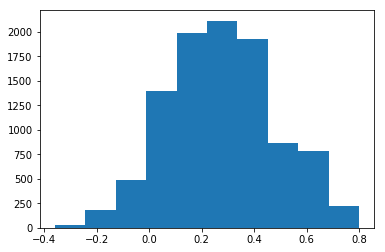

In [14]:
plt.figure()
plt.hist(Magnetization, bins=10)

In [17]:
# Ahora vamos a variar las temperaturas

def GetValues(T, Ntoys = 20000):
    
    sigma_ = sigma.copy()
    
    Energy = []
    Energy2 = []
    Magnetization = []
    
    for i in tqdm(range(Ntoys)):
   
        sigma_ = _ising_step(sigma_,T)

        if i > 10000:
            energy = GetEnergy(sigma_)
            magnetization = GetMagnetization(sigma_)
            Energy.append(energy)
            Energy2.append(energy**2)
            Magnetization.append(magnetization)
            
    e = np.average(Energy)
    e2 = np.average(Energy2)
    m = np.average(Magnetization)

    cv = (e2 - e**2)/(float(M*N)*T**2)   
    
    return e/float(M*N),m,cv    

In [18]:
T = np.arange(1.0,3.0,0.1)

Energy = np.zeros(len(T))
Mag = np.zeros(len(T))
Cv = np.zeros(len(T))

for t in range(len(T)):
    Energy[t], Mag[t], Cv[t] = GetValues(T[t])
    print(T[t], Energy[t], Mag[t], Cv[t])

  2%|▏         | 306/20000 [00:00<00:06, 3054.02it/s]

(-1.996975697569757, -0.9992439243924393, 0.024431894134468165)


  2%|▏         | 308/20000 [00:00<00:06, 3075.30it/s]

(-1.9944794479447945, -0.9986158615861586, 0.0367843852695804)


  2%|▏         | 313/20000 [00:00<00:06, 3125.19it/s]

(-1.9887428742874287, -0.9971017101710171, 0.06325144965745089)


  1%|▏         | 296/20000 [00:00<00:06, 2955.68it/s]

(-1.973105310531053, 0.991985198519852, 0.1733349672719383)


  1%|▏         | 299/20000 [00:00<00:06, 2982.27it/s]

(-1.9744854485448544, -0.9928632863286329, 0.09430906168556094)


  1%|▏         | 288/20000 [00:00<00:06, 2872.82it/s]

(-1.9633283328332833, -0.9901810181018101, 0.14423323702726815)


  1%|▏         | 279/20000 [00:00<00:07, 2783.41it/s]

(-1.9342174217421744, -0.9816561656165619, 0.1973496229510657)


  1%|▏         | 275/20000 [00:00<00:07, 2744.57it/s]

(-1.908086808680868, -0.9744214421442146, 0.2523549955343928)


  1%|▏         | 279/20000 [00:00<00:07, 2786.99it/s]

(-1.8384318431843183, -0.9524892489248925, 0.3985516184369275)


  1%|▏         | 292/20000 [00:00<00:06, 2914.17it/s]

(-1.8187178717871788, -0.9482128212821282, 0.3899314117459)


  1%|▏         | 298/20000 [00:00<00:06, 2975.27it/s]

(-1.8325712571257124, 0.9515251525152516, 0.4015206345117073)


  1%|▏         | 268/20000 [00:00<00:07, 2679.97it/s]

(-1.6482808280828083, 0.8773157315731573, 0.7767251723692536)


  2%|▏         | 301/20000 [00:00<00:06, 3002.04it/s]

(-1.4820402040204022, -0.7290489048904891, 1.4408713182020298)


  1%|▏         | 286/20000 [00:00<00:06, 2857.28it/s]

(-1.4832363236323634, 0.7907130713071309, 1.1534508319778203)


  2%|▏         | 310/20000 [00:00<00:06, 3094.68it/s]

(-1.2678387838783878, -0.6501290129012902, 0.8800928636606902)


  1%|▏         | 278/20000 [00:00<00:07, 2776.39it/s]

(-1.3072267226722674, -0.6993839383938395, 1.024423397571278)


  1%|▏         | 277/20000 [00:00<00:07, 2762.24it/s]

(-0.9711291129112911, 0.30071807180718074, 0.5926461763265568)


  2%|▏         | 301/20000 [00:00<00:06, 3006.21it/s]

(-1.053137313731373, 0.17483548354835488, 0.8958205593786346)


  2%|▏         | 309/20000 [00:00<00:06, 3084.48it/s]

(-0.92989698969897, -0.12545454545454546, 0.49898432942706283)


100%|██████████| 20000/20000 [00:08<00:00, 2438.02it/s]

(-0.9195719571957196, 0.25343734373437343, 0.34840840561677777)


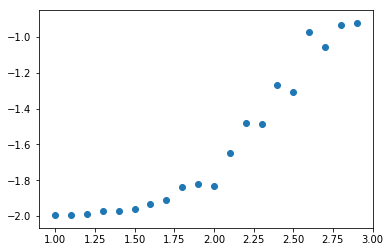

In [19]:
plt.figure()
plt.scatter(T,Energy)

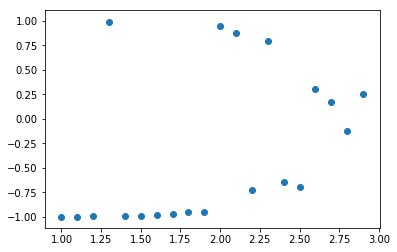

In [20]:
plt.figure()
plt.scatter(T,Mag)

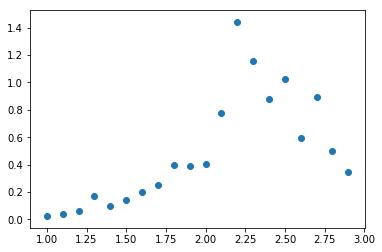

In [21]:
plt.figure()
plt.scatter(T,Cv)